# Random Forest

###### Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


Data Description :

Undergrad : person is under graduated or not;
Marital.Status : marital status of a person;
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government ;
Work Experience : Work experience of an individual person;
Urban : Whether that person belongs to urban area or not;


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [7]:
fc=pd.read_csv("Fraud_check.csv")

In [8]:
fc.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002


In [9]:
fc.shape

(600, 6)

In [10]:
Fc.info()

NameError: name 'Fc' is not defined

In [11]:
fc.isnull().any()

Undergrad          False
Marital.Status     False
City.Population    False
Work.Experience    False
Urban              False
Taxable.Income     False
dtype: bool

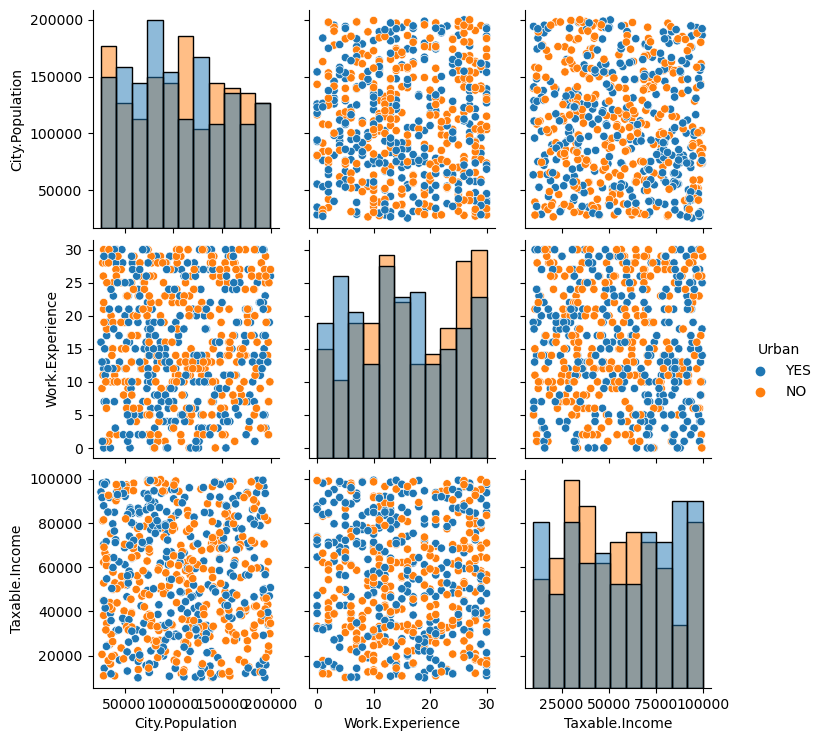

In [12]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=fc, hue="Urban", diag_kind="hist")
plt.show()

In [13]:
fc.describe()

,City.Population,Work.Experience,Taxable.Income
count,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,55208.375000
std,49850.075134,8.842147,26204.827597
min,25779.000000,0.000000,10003.000000
25%,66966.750000,8.000000,32871.500000
50%,106493.500000,15.000000,55074.500000
75%,150114.250000,24.000000,78611.750000
max,199778.000000,30.000000,99619.000000


In [14]:
#Categorical variables
category= [var for var in fc.columns if fc[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(category)))
print('The categorical variables are as follows :\n\n', category)

There are 3 categorical variables

The categorical variables are as follows :

 ['Undergrad', 'Marital.Status', 'Urban']


In [15]:
#Numerical variables
numerical = [var for var in fc.columns if fc[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 3 numerical variables

The numerical variables are : ['City.Population', 'Work.Experience', 'Taxable.Income']


In [16]:
# cardinality check
for var in category:   
    print(var, 'has ', len(fc[var].unique()), ' labels')

Undergrad has  2  labels
Marital.Status has  3  labels
Urban has  2  labels


In [17]:
fc[fc.duplicated()].shape

(0, 6)

In [18]:
fc["Taxable.Income"].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [19]:
fc['Taxable.Income'] = pd.cut(fc['Taxable.Income'], bins=[0,30000,99620], labels=['risky', 'good'])

In [20]:
fc.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,good
1,YES,Divorced,134075,18,YES,good
2,NO,Married,160205,30,YES,good
3,YES,Single,193264,15,YES,good
4,NO,Married,27533,28,NO,good


In [21]:
fc = fc.rename(columns={'Taxable.Income': 'Taxinc',
                        'Marital.Status': 'marital',
                         'City.Population': 'population',
                         'Work.Experience' :'Experience'})

In [22]:
fc['Taxinc']=fc['Taxinc'].map({'risky':0,'good':1})

In [23]:
fc.head()

,Undergrad,marital,population,Experience,Urban,Taxinc
0,NO,Single,50047,10,YES,1
1,YES,Divorced,134075,18,YES,1
2,NO,Married,160205,30,YES,1
3,YES,Single,193264,15,YES,1
4,NO,Married,27533,28,NO,1


In [24]:
label_encoder = preprocessing.LabelEncoder()

fc['Urban']= label_encoder.fit_transform(fc['Urban'])
fc['Undergrad']= label_encoder.fit_transform(fc['Undergrad'])
fc['marital']= label_encoder.fit_transform(fc['marital'])
fc['Taxinc']=label_encoder.fit_transform(fc['Taxinc'])

In [25]:
fc.head()

,Undergrad,marital,population,Experience,Urban,Taxinc
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1


In [26]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [27]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(fc)
df_norm.tail(10)

,Undergrad,marital,population,Experience,Urban,Taxinc
590,0.0,0.5,0.341473,0.466667,1.0,1.0
591,1.0,1.0,0.615406,0.600000,1.0,0.0
592,1.0,1.0,0.283703,0.533333,0.0,1.0
593,0.0,0.0,0.610256,0.333333,1.0,1.0
594,0.0,0.5,0.412341,0.300000,1.0,1.0
595,1.0,0.0,0.078811,0.233333,1.0,1.0
596,1.0,0.0,0.170058,0.066667,1.0,1.0
597,0.0,0.0,0.737240,0.000000,1.0,1.0
598,1.0,0.5,0.886810,0.566667,0.0,1.0
599,0.0,0.0,0.760683,0.533333,0.0,1.0


In [28]:
x=fc.iloc[:,:-1]
y=fc['Taxinc']

In [29]:
x

,Undergrad,marital,population,Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [30]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxinc, Length: 600, dtype: int64

In [31]:
df_norm.Taxinc.value_counts()

1.0    476
0.0    124
Name: Taxinc, dtype: int64

In [32]:
colnames = list(fc.columns)
colnames

['Undergrad', 'marital', 'population', 'Experience', 'Urban', 'Taxinc']

In [33]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

### Building Random forest  Classifier model


In [47]:
model01 = RandomForestClassifier(n_estimators=100, max_depth=10)
model01.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
results = cross_val_score(model01, x, y, cv=kfold)

In [59]:
print(results.mean())

0.7716666666666667


In [48]:
#Predicting on test data
preds01 = model01.predict(x_test) # predicting on test data set 
pd.Series(preds01).value_counts() # getting the count of each category 

1    177
0      3
dtype: int64

In [49]:
preds01

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1], dtype=int64)

In [50]:
pd.crosstab(y_test,preds01) # getting the 2 way table to understand the correct and wrong predictions|

col_0,0,1
Taxinc,,
0,0,37
1,3,140


In [51]:
# Accuracy 
np.mean(preds01==y_test)

0.7777777777777778

### finding the best hyperparameter using grid searchCV

In [52]:
# Define the hyperparameter grid
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [10, 20, 30]}

In [53]:
# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)

In [55]:
# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [56]:
# Get the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'n_estimators': 300}


In [57]:
model_best = RandomForestClassifier(n_estimators=300, max_depth=10)
model_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300)

In [60]:
#Predicting on test data
preds = model_best.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    178
0      2
dtype: int64

In [62]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1], dtype=int64)

In [64]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions|

col_0,0,1
Taxinc,,
0,0,37
1,2,141


In [66]:
print("the accuracy of the model =",accuracy_score(y_test,preds)*100)

the accuracy of the model = 78.33333333333333


    Random forest is the ensemble of the Decision trees and it is very useful in drawing the specific inferences form the data such as feature_importance and also to check the over fitting of the model
    
    here the model created is of accuracy 78.33% which is a good model
    also we can plot the individaul decision trees of the Random forest 

#### plotting of individual trees


In [72]:
# Get the first decision tree in the random forest
# this may be used to plot any of the tree from the forest
tree = model_best.estimators_[0]

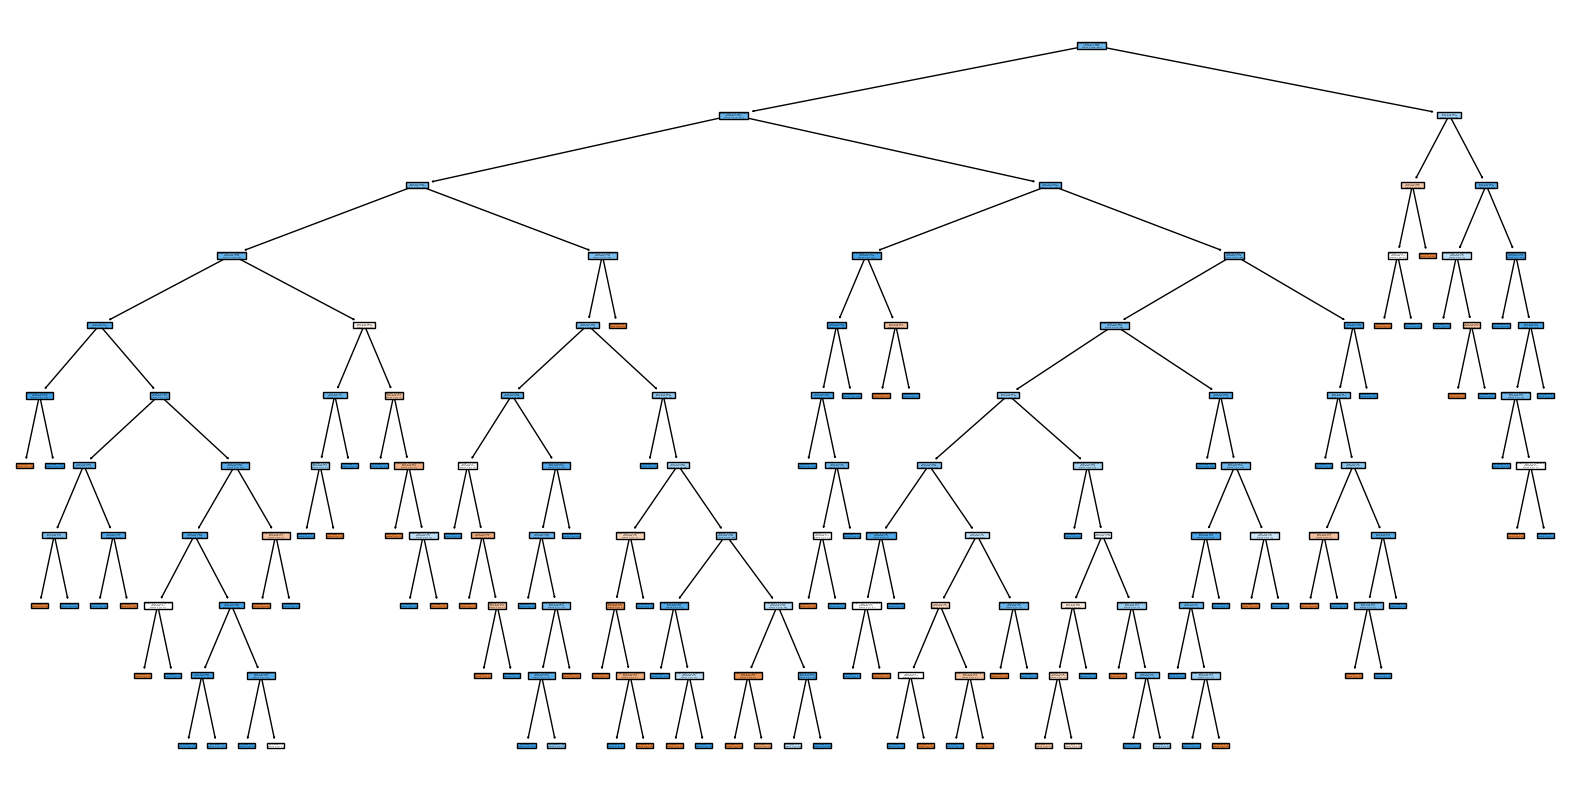

In [73]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=x.columns)
plt.show()